In [12]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torch.utils.data import ConcatDataset
from PIL import Image
import os



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
def get_dataset(data_dir):
    transform = transforms.Compose([
            transforms.ToTensor()
        ])
    train_dataset = datasets.CIFAR10(
        root=data_dir, train=True, download= True,  transform=transform,
    )
    test_dataset = datasets.CIFAR10(
        root=data_dir, train=False, download= True,  transform=transform,
    )
    full_dataset = ConcatDataset([train_dataset, test_dataset])
 
    train_loader = torch.utils.data.DataLoader(
    full_dataset, batch_size=1,
     num_workers=2
)




    return (full_dataset, test_dataset.classes)




data_loader, classes = get_dataset(data_dir = './data/cifar10_1batch')

Files already downloaded and verified
Files already downloaded and verified


In [7]:

i = 0
for image, label  in  iter(data_loader):
    image_pil = transforms.ToPILImage()(image)
    image_pil.save(f'data/low_res/{classes[label]}_{label}_{i}.jpg')
    i += 1

    

In [ ]:
class CustomDataset(datasets.DatasetFolder):
    def __init__(self, root, transform=None, target_transform=None):
        super().__init__(root, transform, target_transform)
        
        # Get a list of all image paths
        self.imgs = self.samples
        
        # Assign labels based on the filenames
        self.targets = [int(os.path.basename(filepath).split('_')[1]) for filepath, _ in self.samples]



In [18]:
data_path = 'data/low_res'


class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.imgs = os.listdir(root)
        
    def __getitem__(self, index):
        img_path = os.path.join(self.root, self.imgs[index])
        img = Image.open(img_path).convert("RGB")
        
        if self.transform is not None:
            img = self.transform(img)
        
        
        label = int(self.imgs[index].split('_')[1])
        
        return img, label
    
    def __len__(self):
        return len(self.imgs)



data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

dataset = CustomDataset(data_path, transform=data_transform)

batch_size = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)







Text(0.5, 1.0, 'truck')

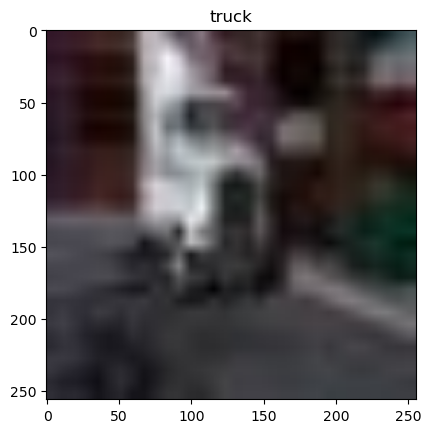

In [29]:
data_iter = iter(data_loader)
images, labels = next(data_iter)
images = images[0].numpy()
image  = np.transpose(images, (1, 2 , 0))
plt.imshow(image)
plt.title(classes[labels.item()])

In [27]:
images.shape

(1, 3, 256, 256)